<a href="https://colab.research.google.com/github/cytrus2012/bachelorthesis/blob/main/HeldKarp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Distance Matrix:
    0.00  1692.83  2252.27  1103.61  2522.81   396.85  1144.65  1469.23   641.04  1296.59
 1692.83     0.00  1708.47  2402.82  1185.96  2056.61  2827.32  2798.45  2125.84  2878.56
 2252.27  1708.47     0.00  3332.92  1073.74  2622.81  3010.00  3715.22  2890.35  3511.68
 1103.61  2402.82  3332.92     0.00  3447.03   822.13  1337.69   401.44   477.36   677.85
 2522.81  1185.96  1073.74  3447.03     0.00  2919.35  3533.92  3848.44  3088.00  3811.19
  396.85  2056.61  2622.81   822.13  2919.35     0.00   855.97  1140.86   351.08   902.34
 1144.65  2827.32  3010.00  1337.69  3533.92   855.97     0.00  1440.79  1048.82   876.07
 1469.23  2798.45  3715.22   401.44  3848.44  1140.86  1440.79     0.00   828.25   600.61
  641.04  2125.84  2890.35   477.36  3088.00   351.08  1048.82   828.25     0.00   753.27
 1296.59  2878.56  3511.68   677.85  3811.19   902.34   876.07   600.61   753.27     0.00

Optimal Cost: 10065.94
Optimal Path: [0, 5, 8, 3, 7, 9, 6, 2, 4, 1]


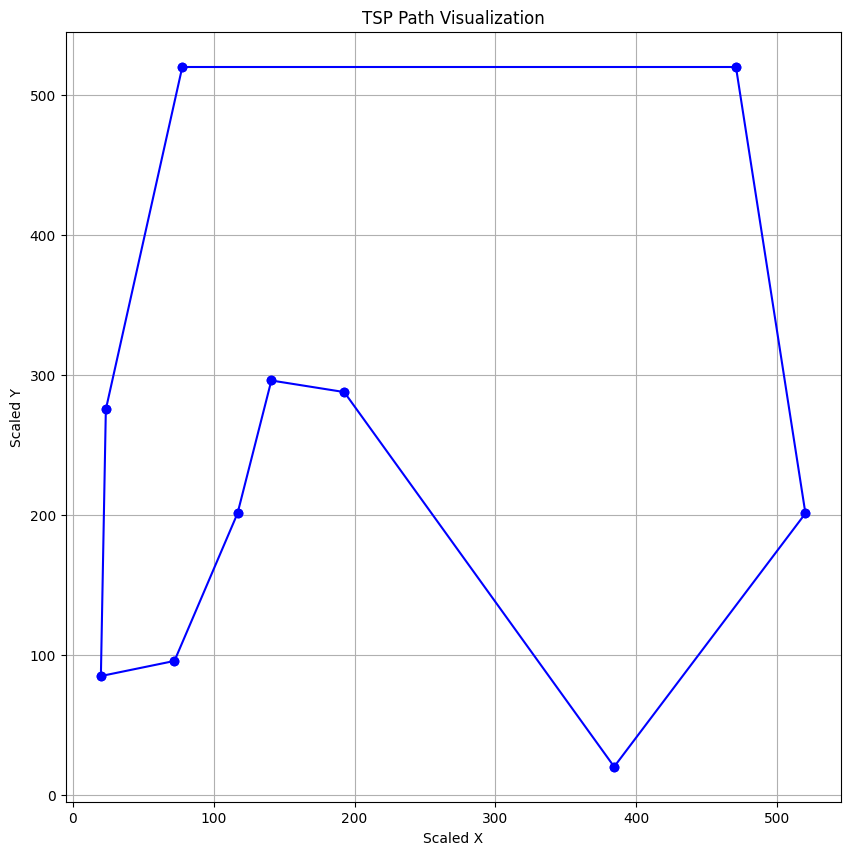

In [17]:
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt


def held_karp(dists):
    """
    Implementation of Held-Karp, an algorithm that solves the Traveling
    Salesman Problem using dynamic programming with memoization.

    Parameters:
        dists: distance matrix

    Returns:
        A tuple, (cost, path).
    """
    n = len(dists)

    # Maps each subset of the nodes to the cost to reach that subset, as well
    # as what node it passed before reaching this subset.
    # Node subsets are represented as set bits.
    C = {}

    # Set transition cost from the initial state
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0][k], 0)

    # Iterate subsets of increasing size and store intermediate results
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            # Set bits for all nodes in this subset
            bits = 0
            for bit in subset:
                bits |= 1 << bit

            for k in subset:
                # Remove the current node k from the subset
                prev = bits & ~(1 << k)

                # Calculate the minimum cost to reach node k
                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev, m)][0] + dists[m][k], m))
                C[(bits, k)] = min(res)

    # Final step: Find the optimal cost to return to the start
    bits = (2**n - 1) - 1  # All nodes except the start
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k][0], k))
    opt, parent = min(res)

    # Backtrack to find the full path
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits

    # Add the start node to complete the path
    path.append(0)

    return opt, list(reversed(path))


def compute_distance_matrix(coords):
    """
    Compute a symmetric distance matrix from the given coordinates.

    Parameters:
        coords: List of (x, y) tuples representing the coordinates.

    Returns:
        A 2D distance matrix.
    """
    n = len(coords)
    dists = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            # Compute Euclidean distance
            dist = math.sqrt((coords[i][0] - coords[j][0])**2 + (coords[i][1] - coords[j][1])**2)
            dists[i][j] = dists[j][i] = dist
    return dists


def addToCanvas(cities, screenSize=500):
    """
    Scale and graph the TSP path using the given coordinates.

    Parameters:
        cities: List of (x, y) tuples representing the coordinates.
        screenSize: Size of the canvas (default is 500).
    """
    # Determine the scaling factors
    min_x = np.min(cities[:, 0])
    min_y = np.min(cities[:, 1])
    max_x = np.max(cities[:, 0])
    max_y = np.max(cities[:, 1])

    plt.figure(figsize=(10, 10))

    for i in range(len(cities)):
        c = cities[i - 1]
        c_next = cities[i]

        scaled_x = (c[0] - min_x) / (max_x - min_x) * screenSize + 20
        scaled_y = (c[1] - min_y) / (max_y - min_y) * screenSize + 20
        scaled_x_next = (c_next[0] - min_x) / (max_x - min_x) * screenSize + 20
        scaled_y_next = (c_next[1] - min_y) / (max_y - min_y) * screenSize + 20

        plt.plot([scaled_x, scaled_x_next], [scaled_y, scaled_y_next], 'bo-')

    plt.title("TSP Path Visualization")
    plt.xlabel("Scaled X")
    plt.ylabel("Scaled Y")
    plt.grid()
    plt.show()


if __name__ == '__main__':
    # Example coordinates (can be replaced with user input or file-based input)
    coordinates = np.array([
        (1380, 939), (2848, 96), (3510, 1671), (457, 334),
        (3888, 666), (984, 965), (500, 1671), (57, 300),
        (800, 666), (84, 900)
    ])

    # Compute the distance matrix from the coordinates
    dists = compute_distance_matrix(coordinates)

    # Pretty-print the distance matrix
    print("Distance Matrix:")
    for row in dists:
        print(' '.join([f"{dist:.2f}".rjust(8) for dist in row]))
    print()

    # Solve the TSP problem using Held-Karp
    cost, path = held_karp(dists)
    print(f"Optimal Cost: {cost:.2f}")
    print(f"Optimal Path: {path}")

    # Visualize the optimal path
    reordered_cities = coordinates[path]
    addToCanvas(reordered_cities)